In [2]:
#This code is use to simulate a trajectory  of a golf ball during its flight

#Imported libraries to help the development of the code
import numpy as np
import matplotlib.pyplot as plt

#a function that plots the graph with different parameters
def plot_curve(theta_degree,speed_drag,air_density,m = 45.9/1000):

    #initial angle in radians
    theta = theta_degree*np.pi/180
    #velocity of the club before impact
    Vc = 51
    #coefficent of restitution
    e = 0.83
    #mass of the club
    Mc = 0.2
    #radius
    radius = 21.3/1000
    
    #moment of inertia
    I = 2/5*m*radius**2
    
    #normal component of velocity
    Vbfn = Vc*np.cos(theta)*(1+e)/(1+m/Mc)
    #parallel component of velocity
    Vbfp = -Vc*np.sin(theta)/(1+m/Mc+m*radius**2/I)
    V = np.sqrt(Vbfn**2+Vbfp**2)
    
    #gravity
    g = 9.81

    #defining the timestamp from zero to tmax
    tmax = ((2 * V) * np.sin(theta)) / g
    timestamp = (tmax+10)*np.linspace(0,1,10000) [:,None]
    time_interval = timestamp[1] - timestamp[0]

    #defining the initial and x and y components of the velocity and inital acceleration
    Vx = V*np.cos(theta)
    Vy = V*np.sin(theta)
    ax = 0
    ay = -g

    #coordinates
    x = np.array([])
    y = np.array([])
    x = np.append(x,0)
    y = np.append(y,0)
    
    #crossectinal area of the ball and the air density in SI
    area = np.pi*radius**2
    #drag coefficent and force
    drag_force = air_density*area*V**2*speed_drag/2
    
    #angular velocity
    angular_velocity =-m*Vbfp*radius/I

    #spin factor
    S = angular_velocity*radius/V
    
    
    #Using the fit for the lift coefient "Aerodynamics of Golf Balls in Still Air"  -3.25S^2+1.99S  
    Cl = -3.25*S**2+1.99*S
    
    #lift of the ball
    L = air_density*area*V**2*Cl/2

    #creating the posistions arrays and updating the velocity and acceleration at each step
    for i in range(len(timestamp)):
        #calculate the disance and the height of the ball in each moment
        x = np.append(x, x[-1] + Vx*time_interval)
        y = np.append(y, y[-1] + Vy*time_interval)
        
        #Calculates the X and Y component of the velocity in each moment
        Vx = Vx + ax*time_interval
        Vy = Vy + ay*time_interval
        V_tot = np.sqrt(Vx**2+Vy**2)
        
        #Calclulating the spin factor at each moment and finding the lift coefficient
        S = angular_velocity*radius/V_tot
        Cl = -3.25*S**2+1.99*S
        
        #calculating the lift and the drag force
        L = air_density*area*V_tot**2*Cl/2
        drag_force = air_density*area*V_tot**2*speed_drag/2
        
        #calculating the X and Y compents of the acceleration
        ax = - drag_force * Vx / V_tot / m - L * Vy / V_tot / m
        ay = - g - drag_force * Vy / V_tot / m + L * Vx / V_tot / m

    #plots the data and visuallize it in the wanted limits
    plt.plot(x,y,label = theta_degree)
    plt.ylim(0,70)
    plt.xlim(0,310)
    


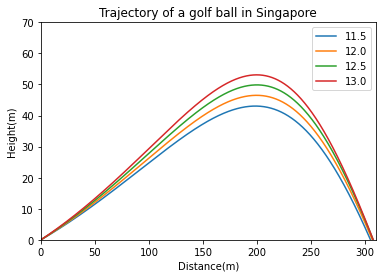

In [3]:
#plot the trajectory in Singapore
for i in np.arange(11.5,13.5,0.5):
    plot_curve(i,0.2,1.17)
plt.title("Trajectory of a golf ball in Singapore")
plt.xlabel("Distance(m)")
plt.ylabel("Height(m)")
plt.legend()

In [ ]:
#plot the trajecotry in Bolivia
for i in np.arange(11.5,13.5,0.5):
    plot_curve(i,0.2,1.27)
plt.title("Trajectory of a golf ball in Bolivia")
plt.xlabel("Distance(m)")
plt.ylabel("Height(m)")
plt.legend()

In [ ]:
#plot the trajectory in St Andrews
for i in np.arange(11.5,13.5,0.5):
    plot_curve(i,0.2,1.22)
plt.title("Trajectory of a golf ball in St Andrews")
plt.xlabel("Distance(m)")
plt.ylabel("Height(m)")
plt.legend()